<center>
    <img src="logo_openclassrooms.png" width="200" alt="data scientist logo"  />
    <img src="logo_data_scientist.png" width="200" alt="data scientist logo"  />
    <strong> Data Scientist </strong>
</center>


# Projet 5: Segmentez des clients d'un site e-commerce

## Nettoyage et analyse exploratoire.

### Sommaire

- <a href="#C1">Présentation</a>

- <a href="#C2">Monthly ARI scores</a>

- <a href="#C3">Monthly ARI scores _ bis</a>

- <a href="#C4">Weekly ARI scores</a>


## <a name="C1">Présentation</a>

Je suis consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.
***

<center>
<img src="olist_homepage.png" width="800" alt="olist_homepage.png"  />
<strong> olist homepage </strong>
</center>

***
### Le besoin de olist

Olist souhaite que je fournisse à ses équipes d'e-commerce __une segmentation des clients__ qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

mon objectif est de __comprendre les différents types d’utilisateurs__ grâce à leur comportement et à leurs données personnelles.

Je devrai __fournir à l’équipe marketing une description actionable__ de ma segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une __proposition de contrat de maintenance__ basée sur une analyse de la stabilité des segments au cours du temps.

### Ma mission

> ma mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Je utiliserai donc des __méthodes non supervisées pour regrouper des clients de profils similaires__. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

1. Je crée un notebook d’analyse exploratoire.
   
1. Je crée un notebook de segmentation :

   - La segmentation proposée doit être exploitable et facile d’utilisation par l'équipe Marketing.
   - Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. 
   - La segmentation doit être sur l’ensemble des clients.
   
1. Dans un deuxième temps, une fois le modèle de segmentation choisi, olis souhaiteraient que je les fasse une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

1. Pour information, le code fourni doit respecter la convention __PEP8__, pour être utilisable par Olist.

In [62]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import adjusted_rand_score
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [63]:
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [64]:
df = pd.read_csv('rfm_date_for_clustering_ari_score.csv')
df.drop(index=df[df['monetary']==0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96093 entries, 0 to 96095
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     96093 non-null  int64  
 1   frequency   96093 non-null  int64  
 2   monetary    96093 non-null  float64
 3   year        96093 non-null  int64  
 4   month       96093 non-null  int64  
 5   year_month  96093 non-null  object 
 6   year_week   96093 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.9+ MB


## <a name="C2" style='background:yellow'>Monthly ARI scores</a>


## <span style='background:pink'> creation of monthly dataframes necessaries for the ARI score modeling <span/>

In [65]:
dff = []

for i in range(0, 9):
    dff.append(pd.DataFrame())

dff[0] = df[df['year'] == 2017][['recency', 'frequency', 'monetary']]

for i in range(1, 9):
    dff[i] = df[(df['year_month'] == '2018-0%s' %i)][['recency', 'frequency', 'monetary']].append(dff[i-1]).sort_index()

# <span style='background:pink'> creation of models necessaries for the ARI score modeling <span/>

## <span style='background:lightblue'> "M0" <span/>

In [66]:
%%time

#initiate dataframes 
dft = []  # t for transformed 
dfn = []  # n for normatized
model = []

for i in range(0, 9):
    #boxcox transformation for the dataframe
    dft.append(pd.DataFrame())
    dft[i]['recency'] = stats.boxcox(dff[i]['recency'])[0]
    dft[i]['frequency'] = stats.boxcox(dff[i]['frequency'])[0]
    dft[i]['monetary'] = stats.boxcox(dff[i]['monetary'])[0]


    # normalize the data
    scalar = StandardScaler()
    dfn.append(pd.DataFrame())
    dfn[i] = scalar.fit_transform(dft[i]) 

    # fit the clustering model "m0"
    m = KMeans(n_clusters=6).fit(dfn[i])
    model.append(m)

CPU times: user 54.9 s, sys: 1.25 s, total: 56.2 s
Wall time: 3.73 s


# <span style='background:pink'> prediction of (labels_true, labels_pred) necessaries for the ARI score modeling <span/>

In [67]:
labels_true = []
labels_pred = []

for i in range(9):
    true=model[i].predict(dfn[i])
    labels_true.append(true)
    pred=model[0].predict(dfn[i])
    labels_pred.append(pred)
    print(labels_true[i].shape)
    print(labels_pred[i].shape)

(43364,)
(43364,)
(50394,)
(50394,)
(56853,)
(56853,)
(63836,)
(63836,)
(70575,)
(70575,)
(77258,)
(77258,)
(83258,)
(83258,)
(89391,)
(89391,)
(95760,)
(95760,)


# <span style='background:pink'> calculation of the ARI scores <span/>

In [68]:
ari=[]
for i in range(9):
    ari.append(adjusted_rand_score(labels_true[i], labels_pred[i]))

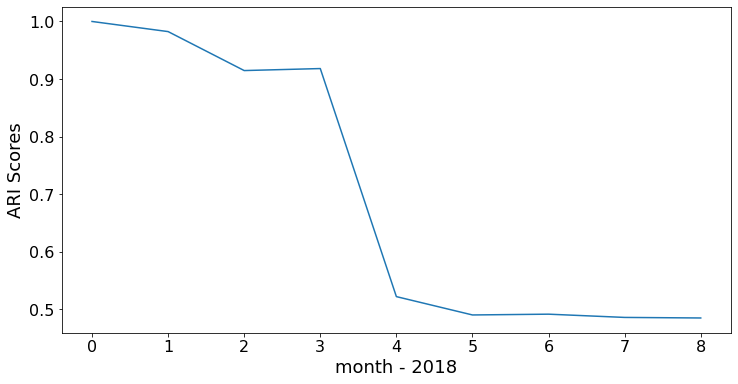

In [69]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=range(9), y=ari)

plt.xlabel('month - 2018', fontsize=18)
plt.xticks(fontsize=16)

plt.ylabel('ARI Scores', fontsize=18)
plt.yticks(fontsize=16)

plt.show()

## <a name="C3" style='background:yellow'>Monthly ARI scores _ bis</a>


## <span style='background:pink'> index for year 2017 <span/>

In [70]:
index_initial = dff[0].index
index_initial

Int64Index([    0,     3,     5,     6,     7,     8,     9,    10,    11,
               17,
            ...
            96080, 96082, 96084, 96086, 96087, 96088, 96089, 96090, 96091,
            96093],
           dtype='int64', length=43364)

# <span style='background:pink'> creation of models_bis necessaries for the ARI score modeling <span/>

In [71]:
dff[1][dff[1].index.isin(index_initial)]

,recency,frequency,monetary
0,381,2,185.53
3,333,1,107.78
5,465,1,96.12
6,555,1,81.16
7,520,1,51.84
...,...,...,...
96088,378,1,97.80
96089,629,1,90.88
96090,602,1,62.74
96091,588,1,43.70


In [72]:
%%time

#initiate dataframes 
dft_bis = []  # t for transformed
dfn_bis = []  # n for normatized

for i in range(9):
    #boxcox transformation for the dataframe
    dft_bis.append(pd.DataFrame())
    dft_bis[i]['recency'] = stats.boxcox(dff[i][dff[i].index.isin(index_initial)]['recency'])[0]
    dft_bis[i]['frequency'] = stats.boxcox(dff[i][dff[i].index.isin(index_initial)]['frequency'])[0]
    dft_bis[i]['monetary'] = stats.boxcox(dff[i][dff[i].index.isin(index_initial)]['monetary'])[0]


    # normalize the data
    scalar = StandardScaler()
    dfn_bis.append(pd.DataFrame())
    dfn_bis[i] = scalar.fit_transform(dft_bis[i]) 

CPU times: user 569 ms, sys: 0 ns, total: 569 ms
Wall time: 567 ms


# <span style='background:pink'> prediction of (labels_true, labels_pred) necessaries for the ARI score modeling <span/>

In [73]:
labels_true = model[0].predict(dfn[0])
print(labels_true.shape)

(43364,)


In [74]:
labels_pred = []

for i in range(9):
    pred=model[i].predict(dfn_bis[i])
    labels_pred.append(pred)
    print(labels_pred[i].shape)

(43364,)
(43364,)
(43364,)
(43364,)
(43364,)
(43364,)
(43364,)
(43364,)
(43364,)


# <span style='background:pink'> calculation of the ARI scores <span/>

In [75]:
ari=[]
for i in range(9):
    ari.append(adjusted_rand_score(labels_true, labels_pred[i]))

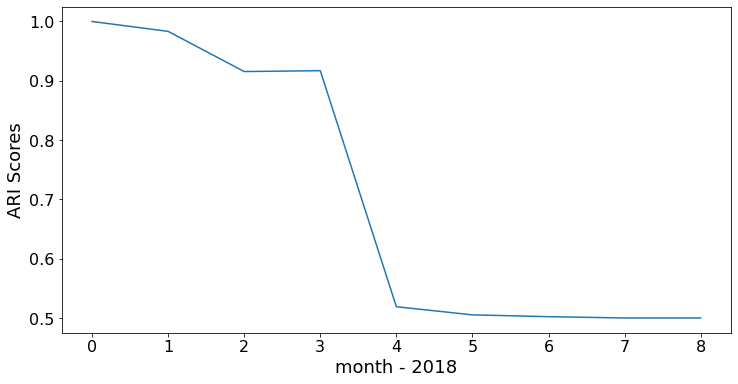

In [76]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=range(9), y=ari)

plt.xlabel('month - 2018', fontsize=18)
plt.xticks(fontsize=16)

plt.ylabel('ARI Scores', fontsize=18)
plt.yticks(fontsize=16)

plt.show()

## <a name="C4" style='background:yellow'>Weekly ARI scores</a>


## <span style='background:pink'> creation of weekly dataframes necessaries for the ARI score modeling <span/>

In [9]:
dff = []

for i in range(0, 35):
    dff.append(pd.DataFrame())

dff[0] = df[df['year'] == 2017][['recency', 'frequency', 'monetary']]

for i in range(1, 10):
    dff[i] = df[(df['year_week'] == '2018-0%s' %i)][['recency', 'frequency', 'monetary']].append(dff[i-1]).sort_index()

for i in range(10, 35):
    dff[i] = df[(df['year_week'] == '2018-%s' %i)][['recency', 'frequency', 'monetary']].append(dff[i-1]).sort_index()    
    

# <span style='background:pink'> creation of models necessaries for the ARI score modeling <span/>

In [10]:
%%time

#initiate dataframes 
dft = []  # t for transformed 
dfn = []  # n for normatized
model = []

for i in range(0, 35):
    #boxcox transformation for the dataframe
    dft.append(pd.DataFrame())
    dft[i]['recency'] = stats.boxcox(dff[i]['recency'])[0]
    dft[i]['frequency'] = stats.boxcox(dff[i]['frequency'])[0]
    dft[i]['monetary'] = stats.boxcox(dff[i]['monetary'])[0]


    # normalize the data
    scalar = StandardScaler()
    dfn.append(pd.DataFrame())
    dfn[i] = scalar.fit_transform(dft[i]) 

    # fit the clustering model "m0"
    m = KMeans(n_clusters=6).fit(dfn[i])
    model.append(m)

CPU times: user 2min 42s, sys: 4.05 s, total: 2min 46s
Wall time: 11.3 s


# <span style='background:pink'> prediction of (labels_true, labels_pred) necessaries for the ARI score modeling <span/>

In [11]:
labels_true = []
labels_pred = []

for i in range(35):
    true=model[i].predict(dfn[i])
    labels_true.append(true)
    pred=model[0].predict(dfn[i])
    labels_pred.append(pred)
    print(labels_true[i].shape)
    print(labels_pred[i].shape)

(43364,)
(43364,)
(44703,)
(44703,)
(46430,)
(46430,)
(48128,)
(48128,)
(49661,)
(49661,)
(51204,)
(51204,)
(52728,)
(52728,)
(54299,)
(54299,)
(55981,)
(55981,)
(57808,)
(57808,)
(59397,)
(59397,)
(60946,)
(60946,)
(62614,)
(62614,)
(64037,)
(64037,)
(65584,)
(65584,)
(67084,)
(67084,)
(68718,)
(68718,)
(70342,)
(70342,)
(72058,)
(72058,)
(73988,)
(73988,)
(75788,)
(75788,)
(76711,)
(76711,)
(77755,)
(77755,)
(79159,)
(79159,)
(80636,)
(80636,)
(82049,)
(82049,)
(83417,)
(83417,)
(84590,)
(84590,)
(85567,)
(85567,)
(87186,)
(87186,)
(88792,)
(88792,)
(90808,)
(90808,)
(92766,)
(92766,)
(94590,)
(94590,)
(95638,)
(95638,)


# <span style='background:pink'> calculation of the ARI scores <span/>

In [12]:
from sklearn.metrics import adjusted_rand_score
ari=[]
for i in range(35):
    ari.append(adjusted_rand_score(labels_true[i], labels_pred[i]))

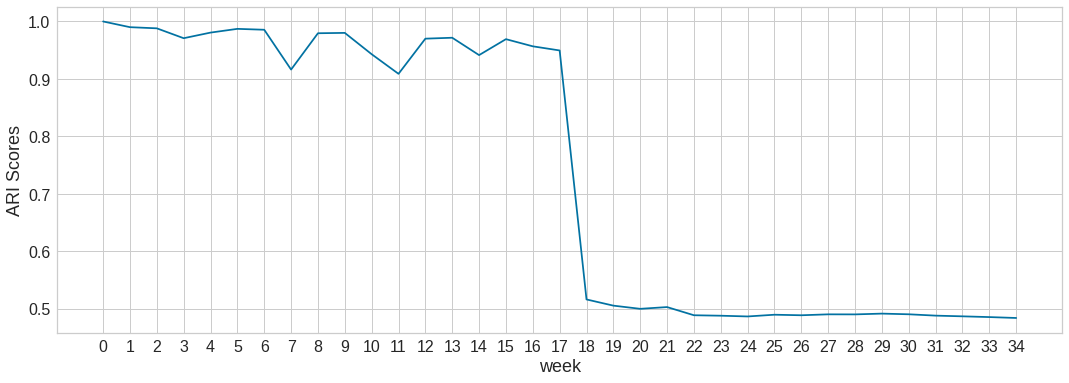

In [13]:
plt.figure(figsize=(18, 6))

sns.lineplot(x=range(35), y=ari)

plt.xlabel('week', fontsize=18)
plt.xticks(np.arange(0, 35), fontsize=16)

plt.ylabel('ARI Scores', fontsize=18)
plt.yticks(fontsize=16)

plt.show()

# <span style='background:tomato'> conclusion <span/>
    
### <p>we suggest for olist to remake the customer segmentation between 3 and 4 month, at last each 16 weeks.</p>     

# Fin